In [1]:
import math
import numpy as np
import pandas as pd
import keras
from keras import ops
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from matplotlib import pyplot as plt
import yfinance as yf

In [2]:
btc = yf.Ticker("BTC-USD")
ticker = "BTC-USD"
start_date = '2020-05-24'
end_date = '2024-05-24'
df = yf.download(
    tickers = ticker,
    start = start_date,
    end = end_date,
    progress = False
)
df = df.drop(columns = "Adj Close")
df = df.reset_index()
data = df

In [4]:
data.describe()

,Date,Open,High,Low,Close,Volume
count,1461,1461.000000,1461.000000,1461.000000,1461.000000,1.461000e+03
mean,2022-05-24 00:00:00,33743.960254,34510.692371,32926.327572,33781.311973,3.162931e+10
min,2020-05-24 00:00:00,8786.107422,8951.005859,8719.667969,8790.368164,5.331173e+09
25%,2021-05-24 00:00:00,20781.912109,21350.806641,20359.845703,20818.476562,1.942720e+10
50%,2022-05-24 00:00:00,30346.921875,30877.330078,29845.214844,30391.646484,2.781953e+10
75%,2023-05-24 00:00:00,44187.140625,45293.867188,43285.207031,44179.921875,3.858539e+10
max,2024-05-23 00:00:00,73079.375000,73750.070312,71334.093750,73083.500000,3.509679e+11
std,NaN,15989.008590,16408.816828,15507.179170,15997.643354,1.903036e+10


In [5]:
df = data[['Date', 'Close']]
df.index = data['Date']
df.head()

,Date,Close
Date,,
2020-05-24,2020-05-24,8790.368164
2020-05-25,2020-05-25,8906.934570
2020-05-26,2020-05-26,8835.052734
2020-05-27,2020-05-27,9181.017578
2020-05-28,2020-05-28,9525.750977


In [7]:
days = 438  #%30 for testing
train_df = df[:len(df)-days]
test_df = df[len(df)-days:];

In [8]:
training_set = train_df['Close'].values
training_set = np.reshape(training_set, (len(training_set), 1))


In [9]:
scaler = MinMaxScaler()
training_set = scaler.fit_transform(training_set)
X_train = training_set[0:len(training_set) - 1]
y_train = training_set[1:len(training_set)]

In [10]:
train_df.head()


,Date,Close
Date,,
2020-05-24,2020-05-24,8790.368164
2020-05-25,2020-05-25,8906.934570
2020-05-26,2020-05-26,8835.052734
2020-05-27,2020-05-27,9181.017578
2020-05-28,2020-05-28,9525.750977


In [11]:
test_df.head()

,Date,Close
Date,,
2023-03-13,2023-03-13,24197.533203
2023-03-14,2023-03-14,24746.074219
2023-03-15,2023-03-15,24375.960938
2023-03-16,2023-03-16,25052.789062
2023-03-17,2023-03-17,27423.929688


In [12]:
from keras.src.layers import LSTM, Dense
from keras import Sequential, optimizers
'''''
optimizer1 = keras.optimizers.Nadam(learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None)
'''''
# tanh Adam
# tanh RMSprop 
# tanh Adamax
# relu Adagrad 
# sigmoid Adadelta 
#tanh SGD
regressor = Sequential()
regressor.add(LSTM(units=5, activation='tanh', input_shape=(0,1))) #tanh ? sigmoid +-
regressor.add(Dense(units=1))
regressor.compile(optimizer= "adam", loss='mean_squared_error') #SGD performs well
regressor.fit(X_train, y_train, batch_size=5, epochs=200)


Epoch 1/200


C:\Users\myagi\PycharmProjects\pythonProject2\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step - loss: 0.1824
Epoch 2/200
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - loss: 0.0590
Epoch 3/200
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - loss: 0.0352
Epoch 4/200
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 0.0200
Epoch 5/200
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 0.0079
Epoch 6/200
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 0.0020
Epoch 7/200
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 6.3751e-04
Epoch 8/200
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - loss: 6.4603e-04
Epoch 9/200
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - loss: 6.0111e-04
Epoch 10/200
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 5.7849e-04
Epoch 11/200
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 5.4315e-04
Epoch 12/200
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 5.6622e-04
Epoch 13/200
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 5.4952e-04
Epoch 14/200
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 5.6158

In [13]:
#regressor.save('btc.keras')
#regressor = keras.models.load_model('btc.keras')

In [14]:
test_set = test_df['Close'].values
x = np.reshape(test_set, (len(test_set), 1))
x = scaler.transform(x)
x = np.reshape(x, (len(x), 1, 1))

In [16]:
predict = regressor.predict(x)
predict = scaler.inverse_transform(predict)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step


In [17]:
print(f"RMSE: {math.sqrt(mean_squared_error(test_set, pred))}")
print(f"MAE: {mean_absolute_error(test_set, pred)}")
print(f"MAPE: {mean_absolute_percentage_error(test_set, pred)}")

RMSE: 657.8131123653999
MAE: 367.114266730879
MAPE: 0.007169330002572311


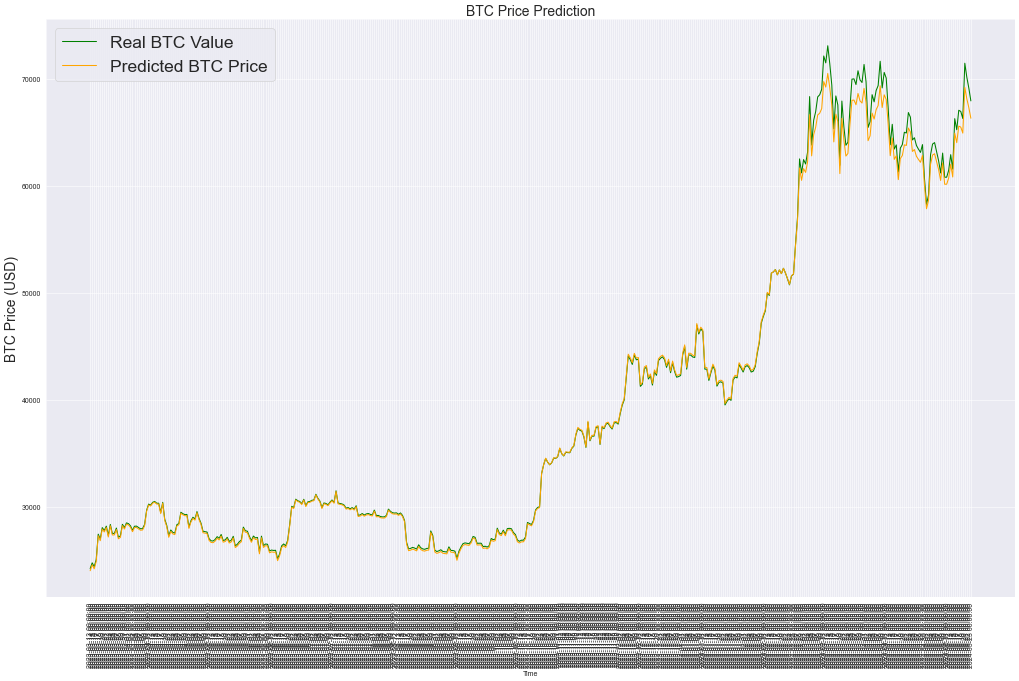

In [21]:
plt.figure(figsize=(25, 15), dpi=50, facecolor='w', edgecolor='k')
ax = plt.gca()
plt.plot(test_set, color='green', label='Real BTC Value')
plt.plot(predict, color='orange', label='Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=20)
df_test = test_df['Close'].reset_index()
x = df_test.index
labels = df_test['Date']
plt.xticks(x, labels, rotation='vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(10)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(10)
plt.xlabel('Time', fontsize=10)
plt.ylabel('BTC Price (USD)', fontsize=20)
plt.legend(loc=2, prop={'size': 25})
plt.show()

In [22]:
test_list = []
for x in test_set:
    test_list.append(x)
    
pred_list = []
for x in predict:
    pred_list.append(x[0])
    
for i, x in enumerate(test_list):
    dt = df_test['Date'][i]
    rp = x
    pp = pred_list[i]
    ae = abs(pp - rp)
    pe = ae / rp * 100
    print("Date: %s\n\treal: %.2f\tpred: %.2f\tabs err: %.2f\tperc err: %.2f" % (dt, rp, pp, ae, pe))

Date: 2023-03-13 00:00:00
	real: 24197.53	pred: 24006.92	abs err: 190.61	perc err: 0.79
Date: 2023-03-14 00:00:00
	real: 24746.07	pred: 24561.51	abs err: 184.56	perc err: 0.75
Date: 2023-03-15 00:00:00
	real: 24375.96	pred: 24187.20	abs err: 188.76	perc err: 0.77
Date: 2023-03-16 00:00:00
	real: 25052.79	pred: 24872.06	abs err: 180.73	perc err: 0.72
Date: 2023-03-17 00:00:00
	real: 27423.93	pred: 27282.37	abs err: 141.56	perc err: 0.52
Date: 2023-03-18 00:00:00
	real: 26965.88	pred: 26815.59	abs err: 150.29	perc err: 0.56
Date: 2023-03-19 00:00:00
	real: 28038.68	pred: 27909.55	abs err: 129.12	perc err: 0.46
Date: 2023-03-20 00:00:00
	real: 27767.24	pred: 27632.53	abs err: 134.71	perc err: 0.49
Date: 2023-03-21 00:00:00
	real: 28175.82	pred: 28049.58	abs err: 126.24	perc err: 0.45
Date: 2023-03-22 00:00:00
	real: 27307.44	pred: 27163.61	abs err: 143.82	perc err: 0.53
Date: 2023-03-23 00:00:00
	real: 28333.97	pred: 28211.09	abs err: 122.88	perc err: 0.43
Date: 2023-03-24 00:00:00
	real: